## SVM
- 분류와 회귀 모두 가능하나 분류에 더 적합한 느낌

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

### 모델 학습 및 평가

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

### SVM의 초평면 위치 시각화 (2개 특성만 사용해서)

In [ ]:
# 시각화를 위한 데이터 준비
# 특성 2개만 사용
df = pd.DataFrame(iris_data.data[:, :2], columns=iris_data.feature_names[:2])
# 타겟 추가
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [13]:
# 데이터 분리
x = iris_data.data[:, :2]
y = iris_data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# 모델 학습 및 평가
# svm_clf = SVC(kernel='linear', C=1.0)
svm_clf = SVC(kernel='rbf', gamma=0.5)

svm_clf.fit(x_train, y_train)
svm_clf.score(x_train, y_train), svm_clf.score(x_test, y_test)

(0.7916666666666666, 0.9)

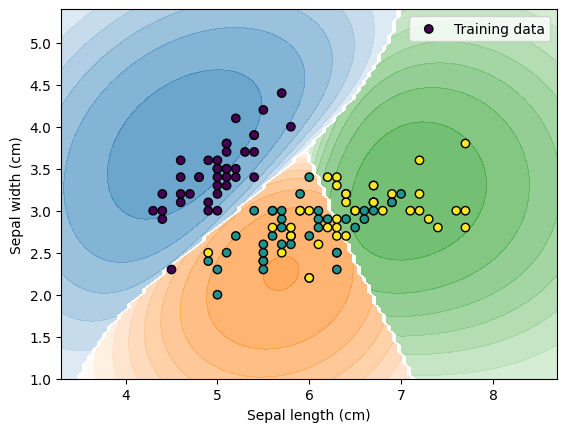

In [ ]:
# rbf 커널 또는 linear 커널 사용시 초평면 시각화

from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(svm_clf, x_train, alpha=0.7)

# 훈련데이터 산점도
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', label='Training data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# SVR

| 특징                   | SVC                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |

**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [36]:
# 데이터 준비
np.random.seed(0)
x = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(x).ravel() + np.random.randn(40) * 0.1

# 데이터 분리
x_test = np.linspace(0, 5, 100).reshape(-1, 1)

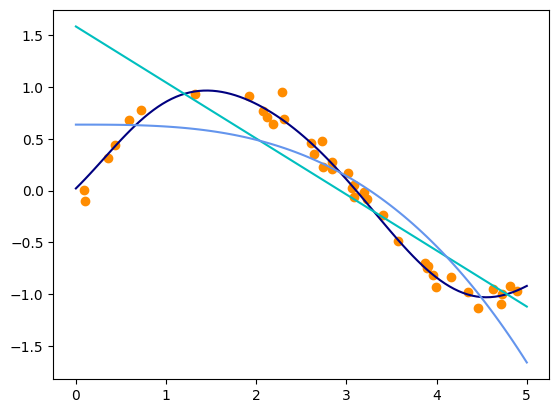

In [39]:
# 다양한 kernel들로 모델 학습
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# 학습
svr_rbf.fit(x, y)
svr_linear.fit(x, y)
svr_poly.fit(x, y)

# 예측
pred_rbf = svr_rbf.predict(x_test)
pred_linear = svr_linear.predict(x_test)
pred_poly = svr_poly.predict(x_test)

# 시각화
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_test, pred_rbf, color='navy', label='rbf_pred')
plt.plot(x_test, pred_linear, color='c', label='lin_pred')
plt.plot(x_test, pred_poly, color='cornflowerblue', label='poly_pred')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_25160\1342210708.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


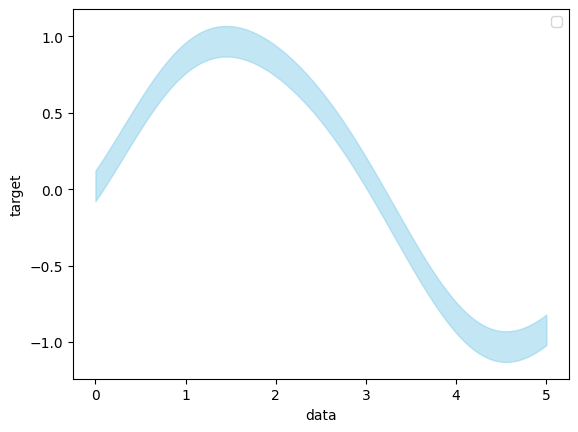

In [42]:
# epsilon 오차 범위 시각화
svr_rbf_epsilon = svr_rbf.epsilon
epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon
plt.fill_between(x_test.ravel(), epsilon_lower, epsilon_upper, color='skyblue', alpha=0.5)

plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

In [ ]:
# 숙제
# 로드
# 분리 스케일링
# SVR 훈련 평가